In [305]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pingouin

In [306]:
df=pd.read_csv('/Users/nafisahasan/Downloads/NetflixOriginals.csv')

In [307]:
#View data
df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


In [308]:
#Check data types
df.dtypes

Title          object
Genre          object
Premiere       object
Runtime         int64
IMDB Score    float64
Language       object
dtype: object

In [309]:
#Describe data
df.describe()

,Runtime,IMDB Score
count,584.000000,584.000000
mean,93.577055,6.271747
std,27.761683,0.979256
min,4.000000,2.500000
25%,86.000000,5.700000
50%,97.000000,6.350000
75%,108.000000,7.000000
max,209.000000,9.000000


In [310]:
#View dataset shape
df.shape

(584, 6)

In [311]:
#Drop duplicates, if any
df.drop_duplicates()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese


In [312]:
#Check to see if there's any null values
df.isna().sum()

Title         0
Genre         0
Premiere      0
Runtime       0
IMDB Score    0
Language      0
dtype: int64

In [313]:
#Check number of genres
df["Genre"].count()

584

In [314]:
#What are the top 5 genres in the dataset, based on occurrence?
df.Genre.value_counts().nlargest(5)

Documentary        159
Drama               77
Comedy              49
Romantic comedy     39
Thriller            33
Name: Genre, dtype: int64

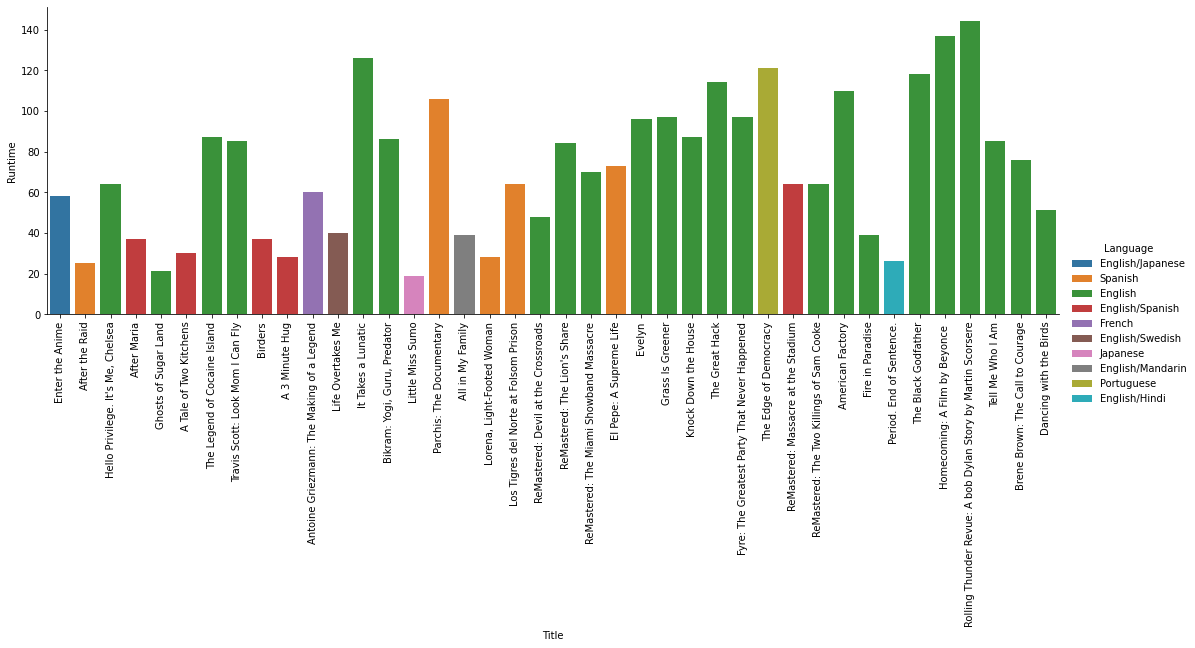

In [315]:
#Visualize the average IMDB score for documentaries premiered in 2019
df["Premiere"]=df["Premiere"].astype("string")
documentary_2019=df[((df["Genre"]=="Documentary")&(df["Premiere"].str.contains("2019")))]
sns.catplot(x="Title",y="Runtime",data=documentary_2019,height=5,aspect=3,hue="Language",kind="bar",dodge=False) 
plt.xticks(rotation=90)
plt.show()

Population Parameter: 93.57705479452055
Sample Statisctic: 89.06
Relative Error (%): 4.827096561693717


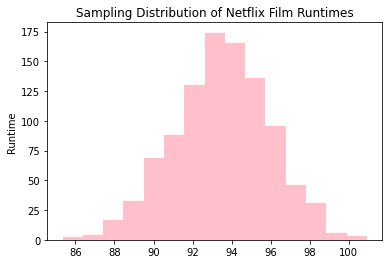

In [316]:
##Simple Random Sampling
#Calculate population parameter
pop_param=df["Runtime"].mean()
print(f"Population Parameter: {pop_param}")
#Calculate sample statistic
point_estimate=df.sample(n=100,random_state=2001)["Runtime"].mean()
print(f"Sample Statisctic: {point_estimate}")
#Calculate relative error as a percentage
rel_error_pct=100*abs(pop_param-point_estimate)/pop_param
print(f"Relative Error (%): {rel_error_pct}")
#Create a sampling distribution
mean_runtime=[]
for i in range(1000):
    mean_runtime.append(df.sample(n=100)["Runtime"].mean())
plt.hist(mean_runtime,bins=15,color="pink")
plt.ylabel("Runtime")
plt.title("Sampling Distribution of Netflix Film Runtimes")
plt.show()

                                 Title            Genre  Runtime
6                    Leyla Everlasting           Comedy      112
9                   Sardar Ka Grandson           Comedy      139
12                             Whipped  Romantic comedy       97
18           What Happened to Mr. Cha?           Comedy      102
22                          Sextuplets           Comedy       99
..                                 ...              ...      ...
399                      Death to 2020           Comedy       70
447                        Rose Island           Comedy      117
478  To All the Boys I've Loved Before  Romantic comedy       99
486               Love per Square Foot  Romantic comedy      133
492            The 40-Year-Old Version           Comedy      124

[88 rows x 3 columns]


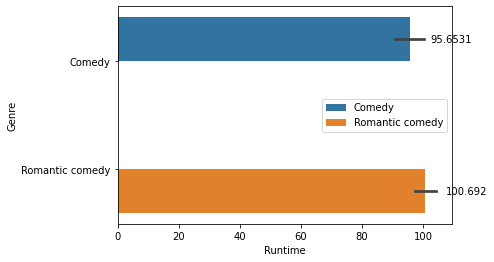

In [317]:
#Was average runtime greater for comedies or romantic comedies?
com_romcom=df[df["Genre"].isin(["Comedy","Romantic comedy"])][["Title","Genre","Runtime"]]
print(com_romcom)
ax=sns.barplot(x="Runtime",y="Genre",data=com_romcom,hue="Genre")
ax.bar_label(ax.containers[0], label_type='edge',padding=20)
ax.bar_label(ax.containers[1], label_type='edge',padding=20)
plt.legend(loc="right")
plt.show()

In [318]:
#What were the highest rated films in English?
df.query('Language=="English"').nlargest(10,"IMDB Score")

,Title,Genre,Premiere,Runtime,IMDB Score,Language
583,David Attenborough: A Life on Our Planet,Documentary,"October 4, 2020",83,9.0,English
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
578,Ben Platt: Live from Radio City Music Hall,Concert Film,"May 20, 2020",85,8.4,English
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
576,Cuba and the Cameraman,Documentary,"November 24, 2017",114,8.3,English
577,Dancing with the Birds,Documentary,"October 23, 2019",51,8.3,English
571,13th,Documentary,"October 7, 2016",100,8.2,English
572,Disclosure: Trans Lives on Screen,Documentary,"June 19, 2020",107,8.2,English
573,Klaus,Animation/Christmas/Comedy/Adventure,"November 15, 2019",97,8.2,English
574,Seaspiracy,Documentary,"March 24, 2021",89,8.2,English


In [319]:
#What was the highest rated film in each language?
df.groupby("Language")["IMDB Score"].max()

Language
Bengali                       7.1
Dutch                         7.1
English                       9.0
English/Akan                  7.7
English/Arabic                7.3
English/Hindi                 7.4
English/Japanese              6.3
English/Korean                7.3
English/Mandarin              7.3
English/Russian               7.3
English/Spanish               7.3
English/Swedish               6.5
English/Taiwanese/Mandarin    6.5
English/Ukranian/Russian      8.4
Filipino                      5.5
French                        6.9
Georgian                      6.8
German                        6.4
Hindi                         7.6
Indonesian                    7.0
Italian                       7.3
Japanese                      6.7
Khmer/English/French          7.2
Korean                        7.5
Malay                         4.2
Marathi                       7.2
Norwegian                     5.1
Polish                        5.7
Portuguese                    8.6
Spani

In [320]:
###What languages were the top rated films in 2020? (IMDB Score>8.0)
#Change Premiere column data type to datetime
df["Premiere"]=pd.to_datetime(df["Premiere"])
#Check to see updated data types
df.dtypes

Title                 object
Genre                 object
Premiere      datetime64[ns]
Runtime                int64
IMDB Score           float64
Language              object
dtype: object

In [321]:
df[((df.Premiere.dt.year==2020)&(df["IMDB Score"]>8))]


,Title,Genre,Premiere,Runtime,IMDB Score,Language
569,My Octopus Teacher,Documentary,2020-09-07,85,8.1,English
570,Rising Phoenix,Documentary,2020-08-26,106,8.1,English
572,Disclosure: Trans Lives on Screen,Documentary,2020-06-19,107,8.2,English
575,The Three Deaths of Marisela Escobedo,Documentary,2020-10-14,109,8.2,Spanish
578,Ben Platt: Live from Radio City Music Hall,Concert Film,2020-05-20,85,8.4,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,89,8.6,Portuguese
583,David Attenborough: A Life on Our Planet,Documentary,2020-10-04,83,9.0,English


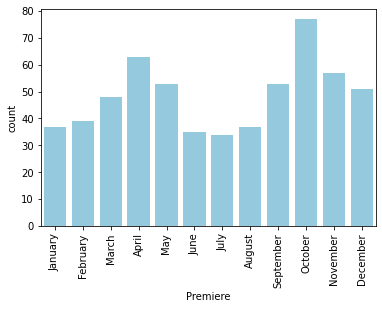

In [332]:
###What month had the most movie releases?
ax=sns.countplot(x=df.Premiere.dt.month,data=df,color="skyblue")
ax.set_xticklabels(["January","February","March","April","May","June","July","August","September","October",
                   "November","December"])
ax.tick_params("x",rotation=90)

plt.show()


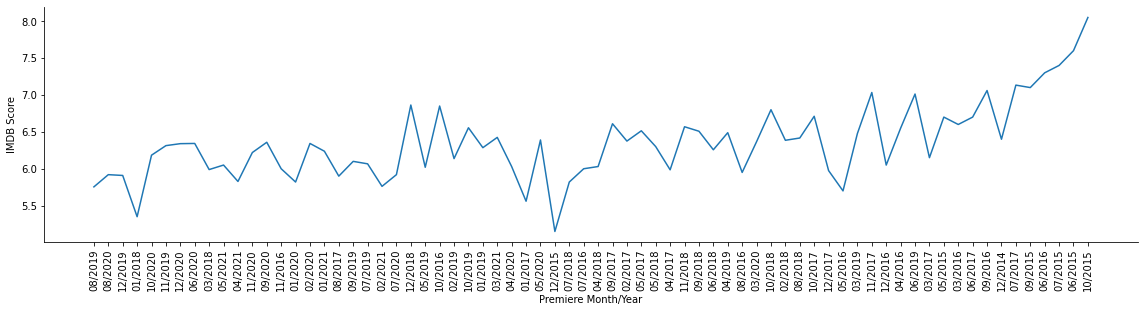

In [323]:
###Visualize movie release date and IMDB Scores 
#Create month/year column
df["Premiere Month/Year"]=df.Premiere.map(lambda x:x.strftime("%m/%Y"))
#Average IMDB  Score for each month
sns.relplot(x="Premiere Month/Year",y="IMDB Score",data=df,kind="line",height=4,aspect=4,ci=None)
plt.xticks(rotation=90)
plt.show()

In [288]:
#What's the average runtime for each of the top 5 genres?
df.groupby("Genre")["Runtime"].mean().nlargest(5)

Genre
Anthology/Dark comedy    149.0
Heist film/Thriller      149.0
Zombie/Heist             148.0
War drama                145.5
Horror anthology         144.0
Name: Runtime, dtype: float64

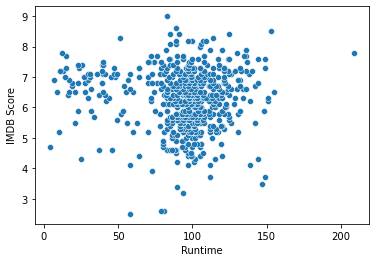

In [289]:
#Is there any association between runtime and IMDB Score?
sns.scatterplot(x="Runtime",y="IMDB Score",data=df)
plt.show()

In [290]:
df["Runtime"].sort_values()

40       4
417      7
325      9
66      10
498     11
      ... 
247    151
284    151
581    153
328    155
561    209
Name: Runtime, Length: 584, dtype: int64

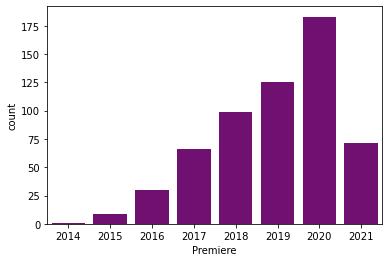

In [333]:
#Which year had the most movie releases?
sns.countplot(x=df.Premiere.dt.year,data=df,color="purple")
plt.show()

In [302]:
###The COVID-19 Pandemic restrictions and lockdowns officially began in March 2020 in the U.S. Were movies that
###premiered in after this date longer than the movies that premiered prior to the pandemic?
#Average movie runtime for movies that premiered prior to March 2020
after_03_20=df[df["Premiere"]>="2020-03"]["Runtime"].mean()
before_03_20=df[df["Premiere"]<"2020-03"]["Runtime"].mean()
print(f"Average runtime of movies premiered before March 2020: {before_03_20}")
print(f"Average runtime of movies premiered after March 2020: {after_03_20}")

Average runtime of movies premiered before March 2020: 91.35672514619883
Average runtime of movies premiered after March 2020: 96.71487603305785


In [291]:
#Hypothesis Testing
###Is mean IMDB Score different for different runtimes?
#H0: The average IMDB score is the same across all runtimes
#HA: The average IMDB score is higher for movies that run longer

In [292]:
#Create new categories of runtime
twenty_fifth=df["Runtime"].quantile(0.25)
median=df["Runtime"].quantile(0.5)
seventy_fifth=df["Runtime"].quantile(0.75)
maximum=df["Runtime"].max()
labels=["Very Short","Short","Average","Long"]
bins=[0,twenty_fifth,median,seventy_fifth,maximum]
df["Runtime Category"]=pd.cut(df["Runtime"],labels=labels,bins=bins)
print(df.head())

             Title                  Genre   Premiere  Runtime  IMDB Score  \
0  Enter the Anime            Documentary 2019-08-05       58         2.5   
1      Dark Forces               Thriller 2020-08-21       81         2.6   
2          The App  Science fiction/Drama 2019-12-26       79         2.6   
3   The Open House        Horror thriller 2018-01-19       94         3.2   
4      Kaali Khuhi                Mystery 2020-10-30       90         3.4   

           Language Premiere Month/Year Runtime Category  
0  English/Japanese             08/2019       Very Short  
1           Spanish             08/2020       Very Short  
2           Italian             12/2019       Very Short  
3           English             01/2018            Short  
4             Hindi             10/2020            Short  


In [293]:
#Find proportion of each runtime category
df["Runtime Category"].value_counts()

Very Short    152
Short         150
Average       146
Long          136
Name: Runtime Category, dtype: int64

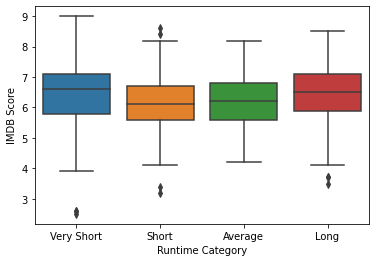

In [294]:
sns.boxplot(x="Runtime Category",y="IMDB Score",data=df)
plt.show()

In [295]:
#Conduct ANOVA test to determine whether there are differences in scores between runtime categories
#set significance level to 0.05
alpha=0.05
pingouin.anova(data=df,dv="IMDB Score",between="Runtime Category")


,Source,ddof1,ddof2,F,p-unc,np2
0,Runtime Category,3,580,3.950041,0.008326,0.020022


In [298]:
#Since ANOVA test resuslts in p-value of less than our significance level (0.05)>0.008326, we know that at least
#2 categories have significantly different IMDB Scores
#Conduct pairwise tests to determine these categories
pingouin.pairwise_tests(data=df,dv="IMDB Score",between="Runtime Category",padjust="bonf")
#df.head()

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Runtime Category,Very Short,Short,False,True,2.610921,294.603448,two-sided,0.009492,0.056952,bonf,3.205,0.299442
1,Runtime Category,Very Short,Average,False,True,2.092203,287.181085,two-sided,0.037298,0.223789,bonf,1.02,0.240784
2,Runtime Category,Very Short,Long,False,True,-0.026377,285.953839,two-sided,0.978975,1.000000,bonf,0.13,-0.003088
3,Runtime Category,Short,Average,False,True,-0.627665,293.497202,two-sided,0.530711,1.000000,bonf,0.154,-0.072717
4,Runtime Category,Short,Long,False,True,-2.703299,277.845104,two-sided,0.007289,0.043732,bonf,4.107,-0.320032
5,Runtime Category,Average,Long,False,True,-2.175033,270.308763,two-sided,0.030495,0.182967,bonf,1.231,-0.259605


In [297]:
#From our hypothesis test, we can reject the null hypothesis since the p-value is less than the significance level
#for 4 categories-> accept alternative hypothesis that average IMDB Score is higher for movies that run longer